In [367]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
df = pd.read_csv('C:/Users/vbigand/Downloads/train.csv')
df_test = pd.read_csv('C:/Users/vbigand/Downloads/test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [368]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [370]:
#Let's get rid of the useless columns
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df_test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [371]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [372]:
print(df['Embarked'].value_counts())
df['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


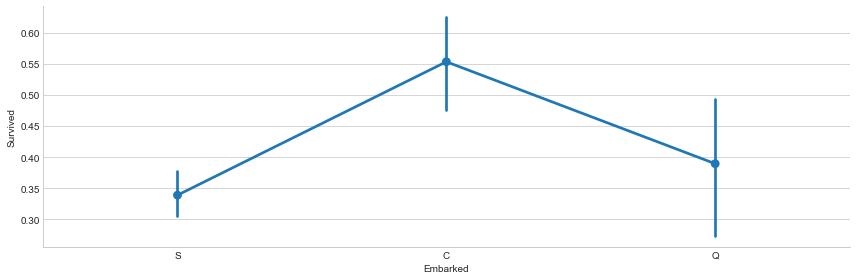

In [373]:
#factor plot: aspect = ratio (width)
sns.factorplot('Embarked','Survived',data=df,size=4,aspect=3)

Text(0,0.5,'Mean(Survived)')

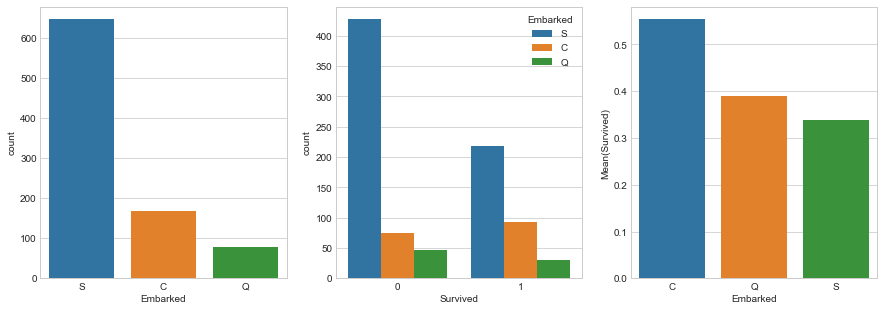

In [374]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot('Embarked',data=df,ax=axis1)
sns.countplot('Survived',data=df,hue='Embarked',ax=axis2)
embark_survive = df[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_survive,ax=axis3)
axis3.set_ylabel('Mean(Survived)')

In [375]:
df.drop(['Embarked'], axis=1,inplace=True)
df_test.drop(['Embarked'], axis=1,inplace=True)

In [376]:
df['Fare'] = df['Fare'].astype(int)
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)
df_test['Fare'] = df_test['Fare'].astype(int)

In [377]:
fare_not_survived = df['Fare'][df['Survived']==0]
fare_survived = df['Fare'][df['Survived']==1]
avg_fare = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(),fare_survived.std()])

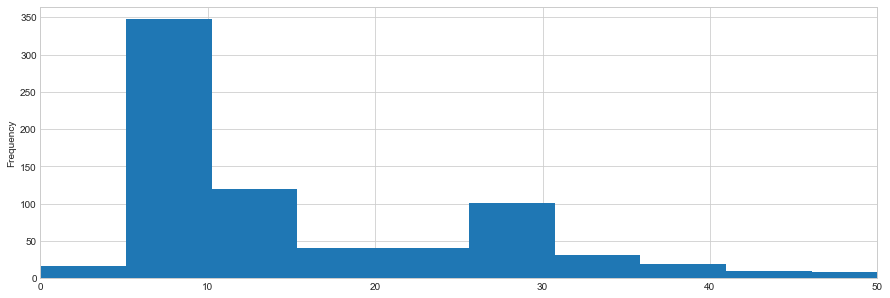

In [378]:
df['Fare'].plot(kind='hist',bins = 100,figsize=(15,5),xlim=(0,50))

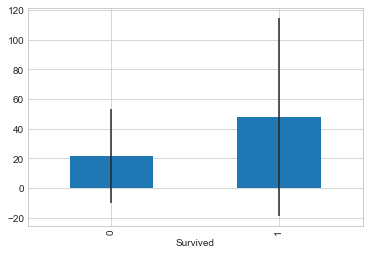

In [379]:
avg_fare.index.names = std_fare.index.names = ["Survived"]
avg_fare.plot(yerr=std_fare,kind='bar',legend=False)

In [380]:
mean_df=df['Age'].mean()
mean_dftest = df_test['Age'].mean()
df['Age'].fillna(mean_df,inplace=True)
df_test['Age'].fillna(mean_dftest,inplace=True)

In [381]:
df['Sex'].replace({'male':1,'female':0},inplace=True)
df_test['Sex'].replace({'male':1,'female':0},inplace=True)

In [382]:
df['Family'] =  df["Parch"] + df["SibSp"]
df['Family'].loc[df['Family'] > 0] = 1
df['Family'].loc[df['Family'] == 0] = 0

df_test['Family'] =  df_test["Parch"] + df_test["SibSp"]
df_test['Family'].loc[df_test['Family'] > 0] = 1
df_test['Family'].loc[df_test['Family'] == 0] = 0

df.drop('Parch',axis=1,inplace=True)
df.drop('SibSp',axis=1,inplace=True)

df_test.drop('Parch',axis=1,inplace=True)
df_test.drop('SibSp',axis=1,inplace=True)

C:\Users\vbigand\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [383]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Family'], dtype='object')

In [384]:
df.drop('Cabin',axis=1,inplace=True)
df_test.drop('Cabin',axis=1,inplace=True)

In [385]:
pclass_dummies_titanic  = pd.get_dummies(df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(df_test['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

df.drop(['Pclass'],axis=1,inplace=True)
df_test.drop(['Pclass'],axis=1,inplace=True)

df = df.join(pclass_dummies_titanic)
df_test = df_test.join(pclass_dummies_test)

In [386]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
df['Person'] = df[['Age','Sex']].apply(get_person,axis=1)
df_test['Person']    = df_test[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
df.drop(['Sex'],axis=1,inplace=True)
df_test.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test = pd.get_dummies(df_test['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

df = df.join(person_dummies_titanic)
df_test = df_test.join(person_dummies_test)

df.drop('Person',axis=1,inplace=True)
df_test.drop('Person',axis=1,inplace=True)

In [387]:
from sklearn.linear_model import LogisticRegression
X_train = df.drop('Survived',axis=1)
y_train = df['Survived']

clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
Y_pred = clf.predict(df_test)

In [388]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_train,y_pred)
score

0.8013468013468014

In [389]:
df_test2 = pd.read_csv('C:/Users/vbigand/Downloads/test.csv')

In [390]:
submission = pd.DataFrame({
        "PassengerId": df_test2["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic_submission.csv', index=False)